# WEATHER ANALYSIS - TIME SERIES FORECASTING


##### 1) DATA IMPORT

In [4]:
import pandas as pd                                                                 #importing pandas python library

In [7]:
weather = pd.read_csv("/Users/ezhilan/Desktop/maindataset.csv" ,index_col="DATE")   # importing and reading our data 
                                                                                    # using pandas read_csv function

In [ ]:
# Using index_column as date column : as it is unique for every row.

In [9]:
weather                                                          

,STATION,PRECIPITATION,HUMIDITY,SUNSHINE,WIND,TMAX,TMIN,TAVG,Unnamed: 9,Unnamed: 10,Unnamed: 11
DATE,,,,,,,,,,,
2012-01-01,IND00093134,0,27,3.7,4.7,82,46,NaN,NaN,NaN,NaN
2012-01-02,IND00093134,10.9,32,0.4,4.5,80,45,NaN,NaN,NaN,NaN
2012-01-03,IND00093134,0.8,44,0.0,2.3,79,50,NaN,NaN,NaN,NaN
2012-01-04,IND00093134,20.3,41,0.0,4.7,86,55,NaN,NaN,NaN,NaN
2012-01-05,IND00093134,1.3,47,0.8,6.1,82,55,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,IND00093134,0.8,20,9.6,1.8,65,55,NaN,NaN,NaN,NaN
2022-12-28,IND00093134,20.3,15,8.2,2.2,64,51,NaN,NaN,NaN,NaN
2022-12-29,IND00093134,1.3,19,5.5,1.2,61,56,NaN,NaN,NaN,NaN


##### 2) DATA CLEANING

In [10]:
# first thing we want to do is find and fix missing values in our data set.

In [11]:
weather.apply(pd.isnull).sum()

STATION             0
PRECIPITATION       4
HUMIDITY           82
SUNSHINE            0
WIND                4
TMAX                0
TMIN                0
TAVG             8037
Unnamed: 9       8037
Unnamed: 10      8037
Unnamed: 11      8037
dtype: int64

In [12]:
# to find which columns have missing values we use 'apply' method on the weather data frame
# and we will pass pandas in the 'null' function which goes column by column through the weather data frame and -
# - look for any null values .
# .sum() gives us the count of all the null values in each column ~ example: PRECIPITATION column has 4 null values.

In [13]:
core_weather = weather[["PRECIPITATION","HUMIDITY","SUNSHINE","WIND","TMAX","TMIN"]].copy()


In [14]:
core_weather

,PRECIPITATION,HUMIDITY,SUNSHINE,WIND,TMAX,TMIN
DATE,,,,,,
2012-01-01,0,27,3.7,4.7,82,46
2012-01-02,10.9,32,0.4,4.5,80,45
2012-01-03,0.8,44,0.0,2.3,79,50
2012-01-04,20.3,41,0.0,4.7,86,55
2012-01-05,1.3,47,0.8,6.1,82,55
...,...,...,...,...,...,...
2022-12-27,0.8,20,9.6,1.8,65,55
2022-12-28,20.3,15,8.2,2.2,64,51
2022-12-29,1.3,19,5.5,1.2,61,56


In [15]:
# we are only taking the columns which are necessary to do our activity 
# so we are copying the necessary columns from 'weather' to create a new table with necessary columns called-
# -'core_weather' 

CHECKING FOR NULL VALUES IN EACH COLUMN


In [16]:
core_weather[pd.isnull(core_weather["PRECIPITATION"])]

,PRECIPITATION,HUMIDITY,SUNSHINE,WIND,TMAX,TMIN
DATE,,,,,,
2020-01-01,NaN,73,0.0,NaN,70,49
2020-01-02,NaN,68,0.0,NaN,70,50
2020-01-01,NaN,73,0.0,NaN,70,49
2020-01-02,NaN,68,0.0,NaN,70,50


In [17]:
core_weather[pd.isnull(core_weather["HUMIDITY"])]

,PRECIPITATION,HUMIDITY,SUNSHINE,WIND,TMAX,TMIN
DATE,,,,,,
2012-05-04,1.8,NaN,11.6,4.6,69,54
2012-08-28,0.8,NaN,7.8,3.2,90,67
2012-10-30,0.5,NaN,6.0,2.8,76,54
2013-06-04,16.5,NaN,5.3,3.4,73,62
2013-08-07,0.8,NaN,12.0,1.9,78,61
...,...,...,...,...,...,...
2019-10-25,0,NaN,0.0,3.4,93,64
2020-04-20,1.8,NaN,11.3,2,69,59
2020-09-04,0,NaN,10.4,2.1,87,66


In [18]:
core_weather[pd.isnull(core_weather["WIND"])]

,PRECIPITATION,HUMIDITY,SUNSHINE,WIND,TMAX,TMIN
DATE,,,,,,
2020-01-01,NaN,73,0.0,NaN,70,49
2020-01-02,NaN,68,0.0,NaN,70,50
2020-01-01,NaN,73,0.0,NaN,70,49
2020-01-02,NaN,68,0.0,NaN,70,50


##### 3) DATA MANIPULATION

FILLING NULL VALUES IN EACH COLUMN

In [19]:
core_weather["PRECIPITATION"] = core_weather["PRECIPITATION"].fillna(0)

In [20]:
core_weather[pd.isnull(core_weather["PRECIPITATION"])]

,PRECIPITATION,HUMIDITY,SUNSHINE,WIND,TMAX,TMIN
DATE,,,,,,


In [21]:
# now in core_weather - 'PRECIPITATION' column has no null values 
# all the null values are replaced to '0' 

In [22]:
core_weather = core_weather.fillna(method="ffill")

In [23]:
core_weather.apply(pd.isnull).sum()

PRECIPITATION    0
HUMIDITY         0
SUNSHINE         0
WIND             0
TMAX             0
TMIN             0
dtype: int64

In [24]:
# now we have no null values in any of the columns 
# as we replaced null values to 0 in PRECIPITATION column 
# and we used 'forward fill' method in other columns , which replaces null values by forward values

VERIFYING THAT WE HAVE CORRECT DATA TYPES 

In [25]:
core_weather.dtypes

PRECIPITATION    object
HUMIDITY         object
SUNSHINE         object
WIND             object
TMAX             object
TMIN             object
dtype: object

In [ ]:
# every columns datatype is in object form 
# we have to convert it into numeric datatype
# astype() command is used to convert datatypes 

In [ ]:
core_weather["PRECIPITATION"] = core_weather["PRECIPITATION"].astype(float)

In [36]:
core_weather.dtypes

PRECIPITATION    float64
HUMIDITY          object
SUNSHINE          object
WIND              object
TMAX              object
TMIN              object
dtype: object

In [37]:
core_weather["HUMIDITY"] = core_weather["HUMIDITY"].astype(float)
core_weather["SUNSHINE"] = core_weather["SUNSHINE"].astype(float)
core_weather["WIND"] = core_weather["WIND"].astype(float)
core_weather["TMAX"] = core_weather["TMAX"].astype(float)
core_weather["TMIN"] = core_weather["TMIN"].astype(float)

In [41]:
core_weather.dtypes

PRECIPITATION    float64
HUMIDITY         float64
SUNSHINE         float64
WIND             float64
TMAX             float64
TMIN             float64
dtype: object

In [ ]:
# every column is converted into numeric datatype as float64

In [43]:
core_weather.index

Index(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
       '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
       ...
       '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26',
       '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31'],
      dtype='object', name='DATE', length=8034)

In [44]:
# index is in object datatypes so it acts as string 
# the index values are actually date&time so we have to convert it into date&time index

In [45]:
core_weather.index = pd.to_datetime(core_weather.index)

In [46]:
core_weather.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='DATE', length=8034, freq=None)

In [47]:
# datatype of index is changed into datetime64


##### 4) DATA ANALYSIS & VISUALIZATION 

In [49]:
import matplotlib.pyplot as plt                                  # importing matplotlib library for visualization

<Axes: xlabel='DATE'>

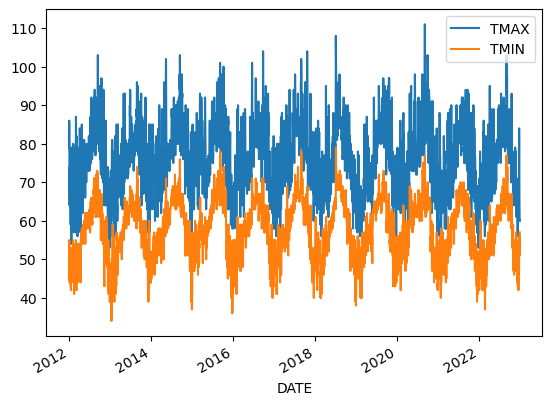

In [50]:
core_weather[["TMAX","TMIN"]].plot()

<Axes: xlabel='DATE'>

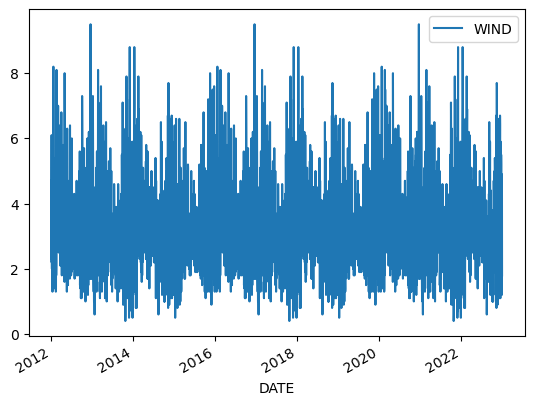

In [51]:
core_weather[["WIND"]].plot()

<Axes: xlabel='DATE'>

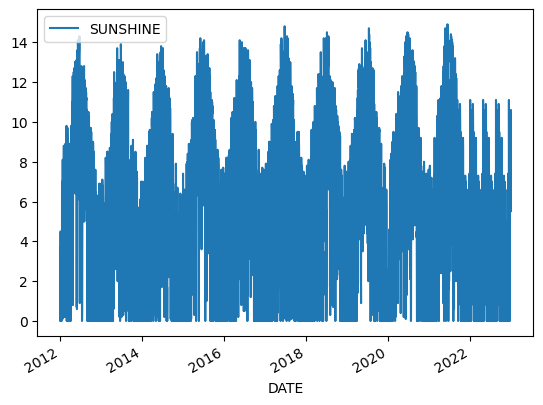

In [52]:
core_weather[["SUNSHINE"]].plot()

<Axes: xlabel='DATE'>

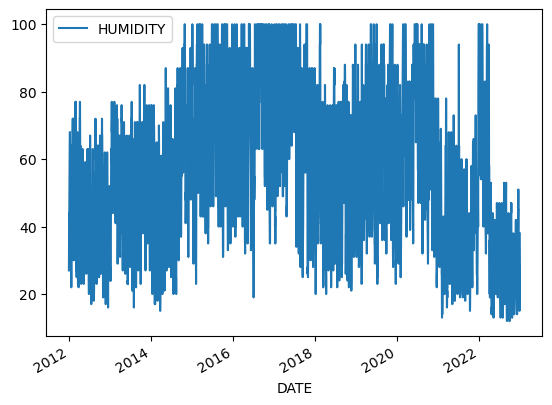

In [53]:
core_weather[["HUMIDITY"]].plot()

<Axes: xlabel='DATE'>

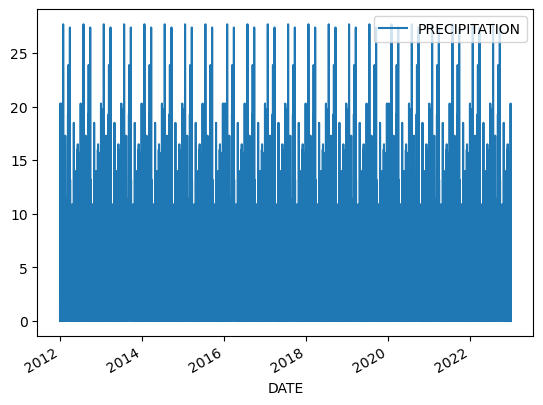

In [54]:
core_weather[["PRECIPITATION"]].plot()